In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import xarray as xr
import numpy as np
from natsort import natsorted
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [4]:
import sys
original_path = os.getcwd()  
os.chdir(original_path)
function_path = './functions/'
sys.path.append(function_path)

from smoothing_function import *
from model_analysis_function import *


### Read model data

In [5]:
file_path = './saved_data/'
file_name = '0.4.His-ALL.25mods.mean.nonmasked.Tas.anomalies.46AR6regions_7cont_1glob_171years_1850-2020.pkl'
with open(file_path + file_name, "rb") as f:
    mod_all = pickle.load(f)


file_name = '0.4.His-ANT.NAT.GHG.OA.10mods.mean.nonmasked.Tas.anomalies.46AR6regions_7cont_1glob_171years_1850-2020.pkl'
with open(file_path + file_name, "rb") as f:
    mod_sub_force = pickle.load(f)


In [ ]:
smoothed_mod_all = apply_smoothing_to_all_models_regions(
    mod_all,
    smooth_func=smooth_repetition_avg,
    end_year=2020
)

smoothed_mod_all = smoothed_mod_all.expand_dims('forcing').assign_coords(forcing = ['ALL'])


Processing model 1/25: ACCESS-CM2
  Region 1/54: 0
  Region 2/54: 1
  Region 3/54: 2
  Region 4/54: 3
  Region 5/54: 4
  Region 6/54: 5
  Region 7/54: 6
  Region 8/54: 7
  Region 9/54: 8
  Region 10/54: 9
  Region 11/54: 10
  Region 12/54: 11
  Region 13/54: 12
  Region 14/54: 13
  Region 15/54: 14
  Region 16/54: 15
  Region 17/54: 16
  Region 18/54: 17
  Region 19/54: 18
  Region 20/54: 19
  Region 21/54: 20
  Region 22/54: 21
  Region 23/54: 22
  Region 24/54: 23
  Region 25/54: 24
  Region 26/54: 25
  Region 27/54: 26
  Region 28/54: 27
  Region 29/54: 28
  Region 30/54: 29
  Region 31/54: 30
  Region 32/54: 31
  Region 33/54: 32
  Region 34/54: 33
  Region 35/54: 34
  Region 36/54: 35
  Region 37/54: 36
  Region 38/54: 37
  Region 39/54: 38
  Region 40/54: 39
  Region 41/54: 40
  Region 42/54: 41
  Region 43/54: 42
  Region 44/54: 43
  Region 45/54: 44
  Region 46/54: 45
  Region 47/54: 46
  Region 48/54: 47
  Region 49/54: 48
  Region 50/54: 49
  Region 51/54: 50
  Region 52/54: 

In [ ]:
def smooth_all_forcings(mod_sub_force, smooth_func, end_year):
    """
    Apply smoothing to each forcing separately and stack back into one DataArray.
    
    Parameters
    ----------
    mod_sub_force : xr.DataArray
        dims: forcing, model_name, year, region
    smooth_func : function
        smoothing function used inside apply_smoothing_to_all_models_regions
    end_year : int
        final year of smoothing
    
    Returns
    -------
    xr.DataArray
        same dims as input, but smoothed.
    """
    
    smoothed_list = []
    
    for f_i in range(mod_sub_force.sizes['forcing']):
        
        da_one_force = mod_sub_force.isel(forcing=f_i)
        
        smoothed_single = apply_smoothing_to_all_models_regions(
            da_one_force,
            smooth_func=smooth_func,
            end_year=end_year
        )
        
        # Add the forcing dimension back
        smoothed_single = smoothed_single.expand_dims(forcing=[f_i])
        
        smoothed_list.append(smoothed_single)
    
    # Concatenate all forcings
    smoothed_all = xr.concat(smoothed_list, dim="forcing")
    
    # Assign forcing names back if they exist
    if "forcing" in mod_sub_force.coords:
        smoothed_all = smoothed_all.assign_coords(forcing=mod_sub_force['forcing'])
    
    return smoothed_all

smoothed_mod_sub_force = smooth_all_forcings(
    mod_sub_force,
    smooth_func=smooth_repetition_avg,
    end_year=2020
)

In [ ]:

smoothed_mod_all = smoothed_mod_all.expand_dims('forcing').assign_coords(forcing = ['ALL'])

smoothed_mod_all


ValueError: Dimension forcing already exists.

#### Save to files

In [22]:
save_path = './saved_data/'
name = '0.4.Smoothed_His-ALL.25mods.mean.nonmasked.Tas.anomalies.46AR6regions_7cont_1glob_171years_1850-2020.pkl'
with open(save_path + name, 'wb') as wi:
	pickle.dump(smoothed_mod_all, wi)

name = '0.4.Smoothed_His-ANT.NAT.GHG.OA.10mods.mean.nonmasked.Tas.anomalies.46AR6regions_7cont_1glob_171years_1850-2020.pkl'

with open(save_path + name, 'wb') as wi:
	pickle.dump(smoothed_mod_sub_force, wi)

#### Smooth for the long ALL series from 1850-2100

In [27]:
mod_all_full

<xarray.DataArray 'tas' (model_name: 22, year: 251, region: 54)> Size: 2MB
array([[[-2.15901578e-01,  1.43320881e-01,  2.54417865e-03, ...,
         -1.46664465e-01, -7.16604304e-01,  5.87048156e-02],
        [-4.16093444e-01,  6.83030749e-01,  2.16079358e-01, ...,
          1.75316965e-02, -4.89882111e-01,  8.61004953e-02],
        [-6.23343570e-01, -5.81249364e-01, -2.78499778e-01, ...,
         -2.39693902e-01, -7.60633215e-01, -2.42950141e-02],
        ...,
        [ 8.95787761e+00,  1.05988258e+01,  1.15347315e+01, ...,
          5.31488298e+00,  6.09639870e+00,  7.39133170e+00],
        [ 8.82625052e+00,  1.07951120e+01,  1.13859372e+01, ...,
          5.57528219e+00,  6.03502009e+00,  7.50522593e+00],
        [ 8.82518198e+00,  1.07480415e+01,  1.17532098e+01, ...,
          5.58442790e+00,  6.06215665e+00,  7.67315083e+00]],

       [[-3.42253024e-01, -3.37393875e-02, -5.91350299e-02, ...,
         -1.53708143e-01, -2.63054622e-01, -2.99057797e-02],
        [-7.06594996e-02, -1.37067052e-01,  8.17285170e-02, ...,
         -1.60115780e-01, -4.29899737e-01, -2.81950713e-02],
        [-5.04761380e-02, -2.12680762e-01,  1.02244437e-01, ...,
         -2.20290193e-01, -4.38324049e-01, -6.55538528e-02],
...
          3.63832229e+00,  3.87003009e+00,  5.33953280e+00],
        [ 6.33046671e+00,  9.28309588e+00,  9.23922022e+00, ...,
          3.42930132e+00,  3.20069935e+00,  5.35218648e+00],
        [ 5.93587099e+00,  9.29337806e+00,  1.02472800e+01, ...,
          3.56834130e+00,  3.28791573e+00,  5.62924247e+00]],

       [[ 2.18362660e-01,  6.34039142e-02,  7.54625948e-01, ...,
         -7.32664535e-02,  1.98977971e-01,  1.47516774e-01],
        [-1.07614812e-01, -2.16539873e-01,  9.60642448e-02, ...,
         -1.55146888e-01, -2.88068511e-01,  9.23951985e-02],
        [-2.79076918e-01,  1.01326183e+00,  5.73120786e-01, ...,
         -1.91405651e-01, -4.46684111e-01,  1.89543478e-01],
        ...,
        [ 1.20750726e+01,  1.50119080e+01,  1.56591927e+01, ...,
          5.98166744e+00,  7.96704828e+00,  9.01194248e+00],
        [ 1.24020275e+01,  1.52208122e+01,  1.54932322e+01, ...,
          6.08907373e+00,  8.05750513e+00,  9.05755148e+00],
        [ 1.24994215e+01,  1.51066257e+01,  1.60234565e+01, ...,
          6.15674974e+00,  8.21170029e+00,  9.09949058e+00]]],
      shape=(22, 251, 54))
Coordinates:
  * year        (year) int64 2kB 1850 1851 1852 1853 ... 2097 2098 2099 2100
  * model_name  (model_name) object 176B 'ACCESS-CM2' ... 'UKESM1-0-LL'
  * region      (region) int64 432B 0 1 2 3 4 5 6 7 ... 46 47 48 49 50 51 52 53
    abbrevs     (region) <U4 864B 'GIC' 'NWN' 'NEN' 'WNA' ... 'AU' 'ANT' 'LSAT'
    names       (region) <U25 5kB 'Greenland/Iceland' ... 'Global Land'
    forcing     <U3 12B 'ALL'

In [39]:
file_name = '0.4.His-Fu-ALL.25mods.mean.nonmasked.Tas.anomalies.46AR6regions_7cont_1glob_251years_1850-2100.pkl'
with open(file_path + file_name, "rb") as f:
    mod_all_full = pickle.load(f)

# mod_all_full.sel(model_name = 'CESM2')[0,:,0]
mod_all_full = mod_all_full.dropna(dim = 'model_name', how = 'any').squeeze()

smoothed_mod_all = apply_smoothing_to_all_models_regions(
    mod_all_full,
    smooth_func=smooth_repetition_avg,
    end_year=2100,
    extended_years = mod_all_full['year'])

smoothed_mod_all = smoothed_mod_all.expand_dims('forcing').assign_coords(forcing = ['ALL'])


Processing model 1/25: ACCESS-CM2
  Region 1/54: 0
  Region 2/54: 1
  Region 3/54: 2
  Region 4/54: 3
  Region 5/54: 4
  Region 6/54: 5
  Region 7/54: 6
  Region 8/54: 7
  Region 9/54: 8
  Region 10/54: 9
  Region 11/54: 10
  Region 12/54: 11
  Region 13/54: 12
  Region 14/54: 13
  Region 15/54: 14
  Region 16/54: 15
  Region 17/54: 16
  Region 18/54: 17
  Region 19/54: 18
  Region 20/54: 19
  Region 21/54: 20
  Region 22/54: 21
  Region 23/54: 22
  Region 24/54: 23
  Region 25/54: 24
  Region 26/54: 25
  Region 27/54: 26
  Region 28/54: 27
  Region 29/54: 28
  Region 30/54: 29
  Region 31/54: 30
  Region 32/54: 31
  Region 33/54: 32
  Region 34/54: 33
  Region 35/54: 34
  Region 36/54: 35
  Region 37/54: 36
  Region 38/54: 37
  Region 39/54: 38
  Region 40/54: 39
  Region 41/54: 40
  Region 42/54: 41
  Region 43/54: 42
  Region 44/54: 43
  Region 45/54: 44
  Region 46/54: 45
  Region 47/54: 46
  Region 48/54: 47
  Region 49/54: 48
  Region 50/54: 49
  Region 51/54: 50
  Region 52/54: 

In [40]:
save_path = './saved_data/'
name = '0.4.Smoothed_His-Fu-ALL.25mods.mean.nonmasked.Tas.anomalies.46AR6regions_7cont_1glob_251years_1850-2100.pkl'
with open(save_path + name, 'wb') as wi:
	pickle.dump(smoothed_mod_all, wi)

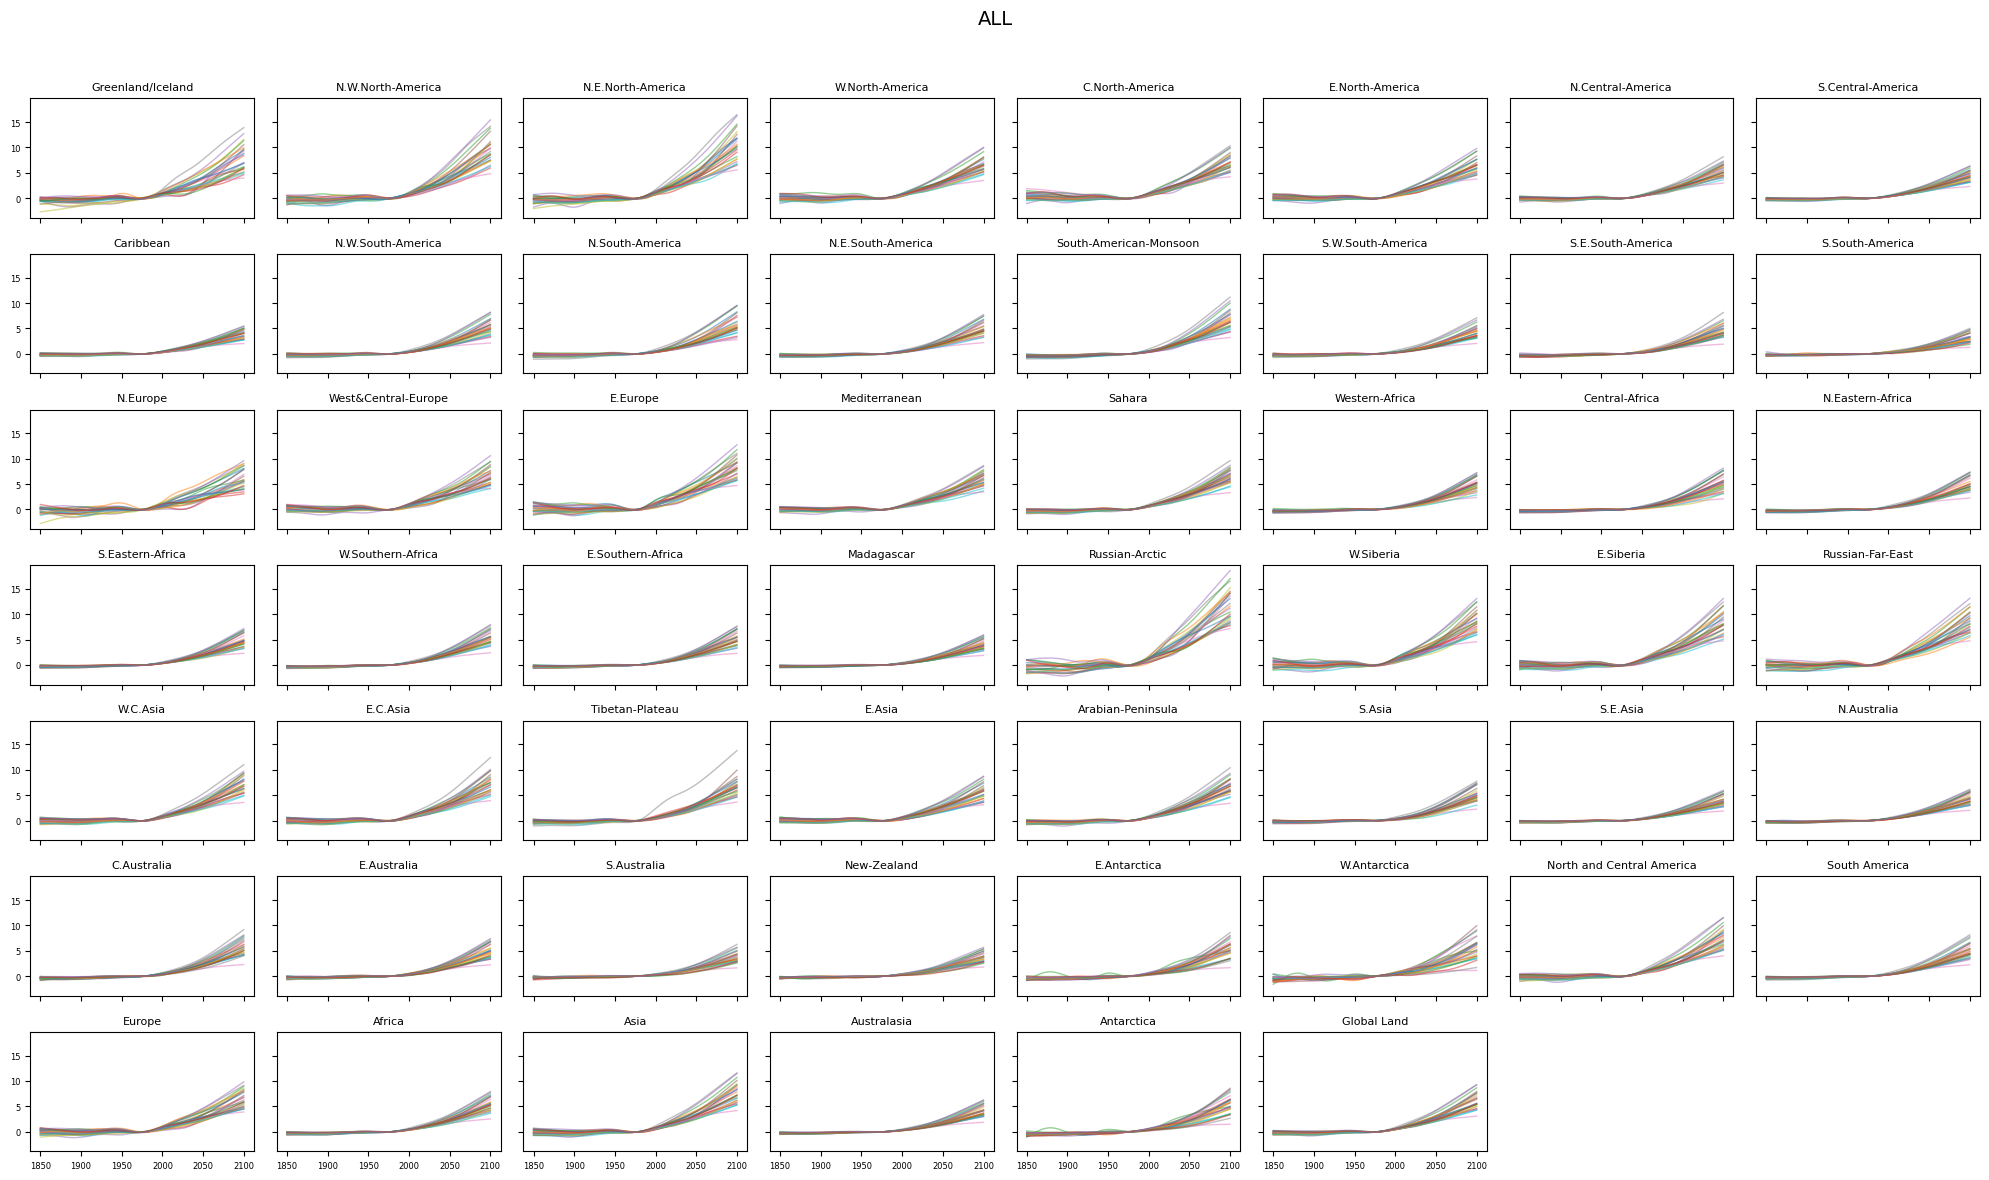

In [41]:
plot_model_time_series_per_region(smoothed_mod_all.squeeze(), title = 'ALL')


#### Plotting

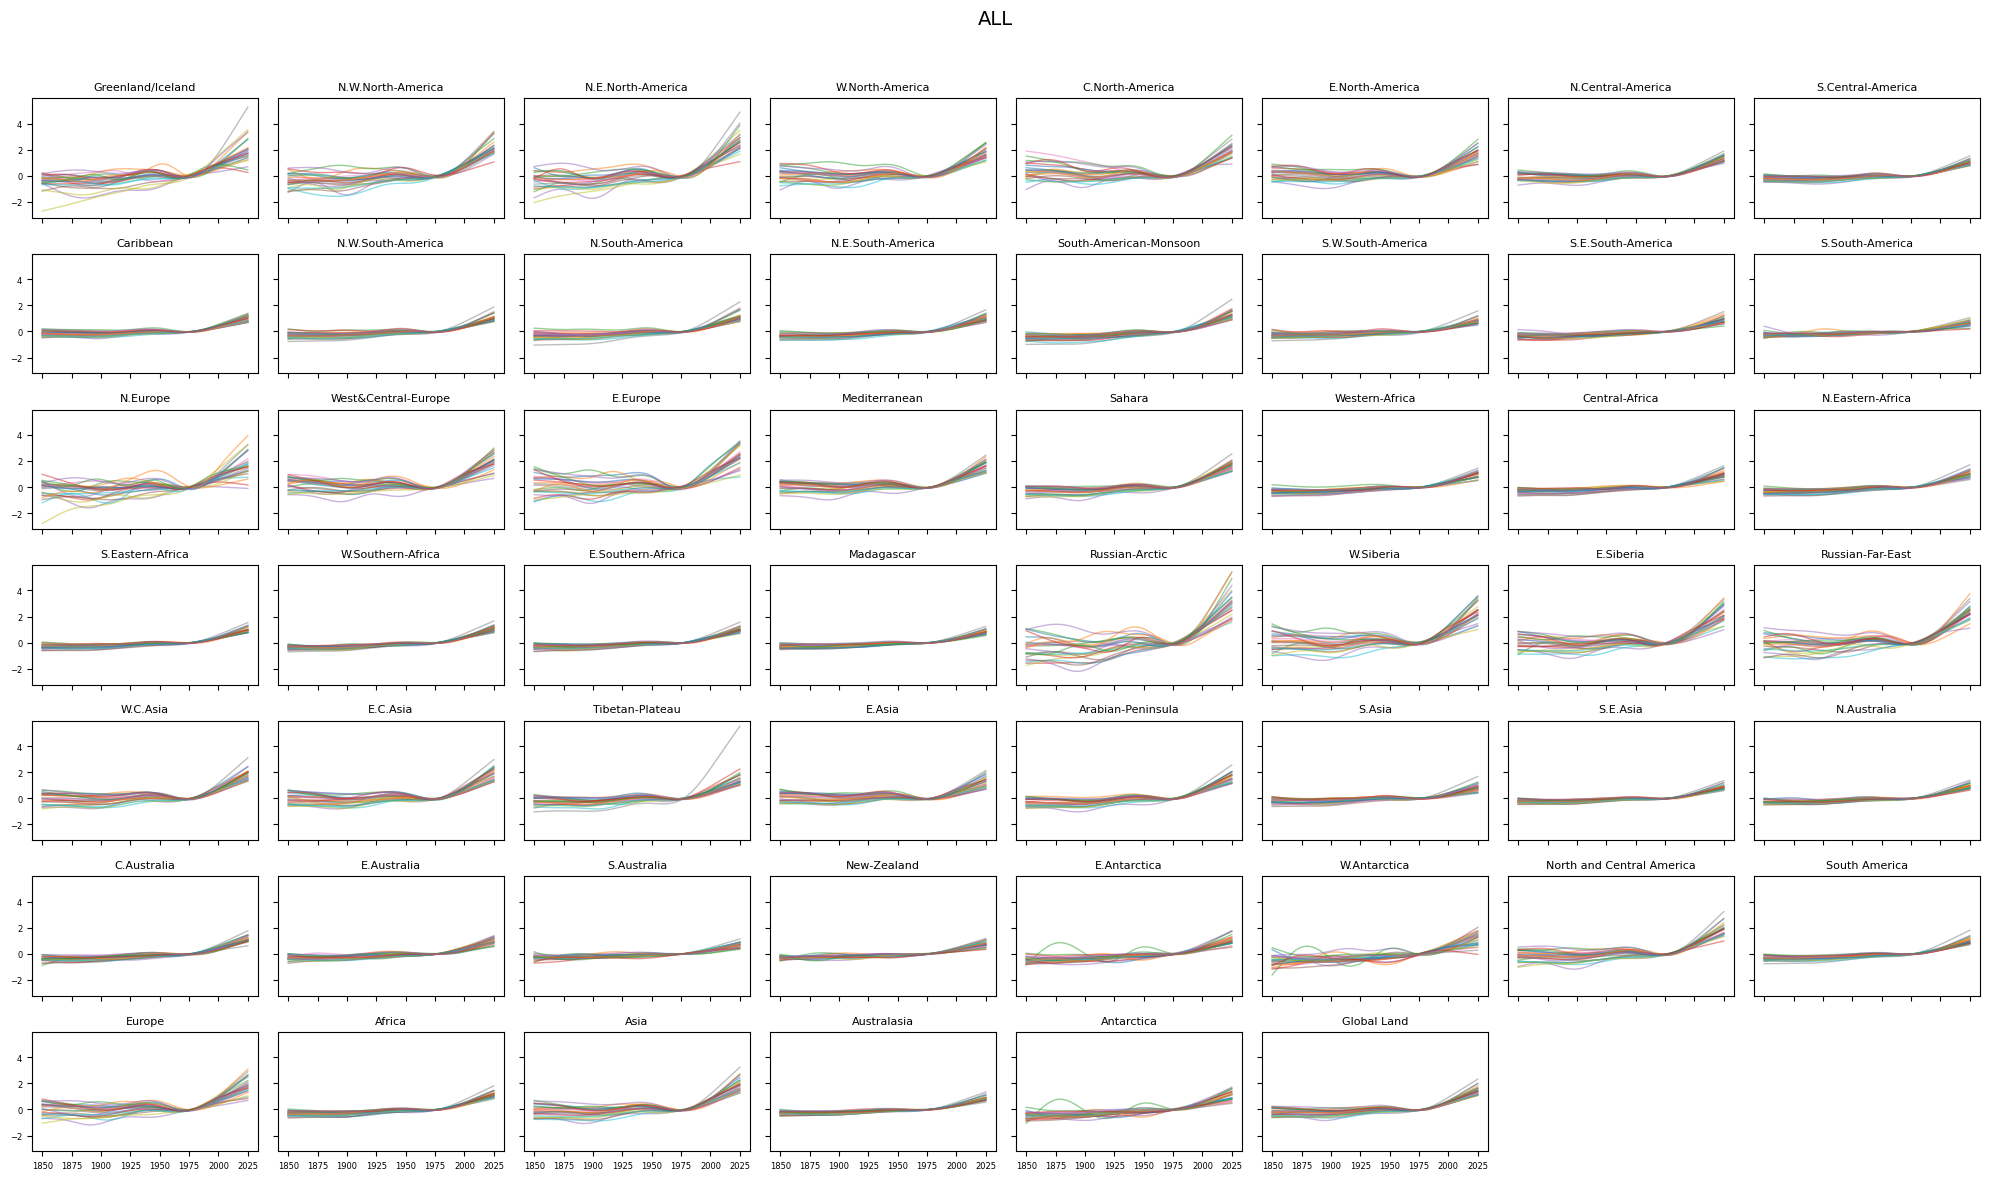

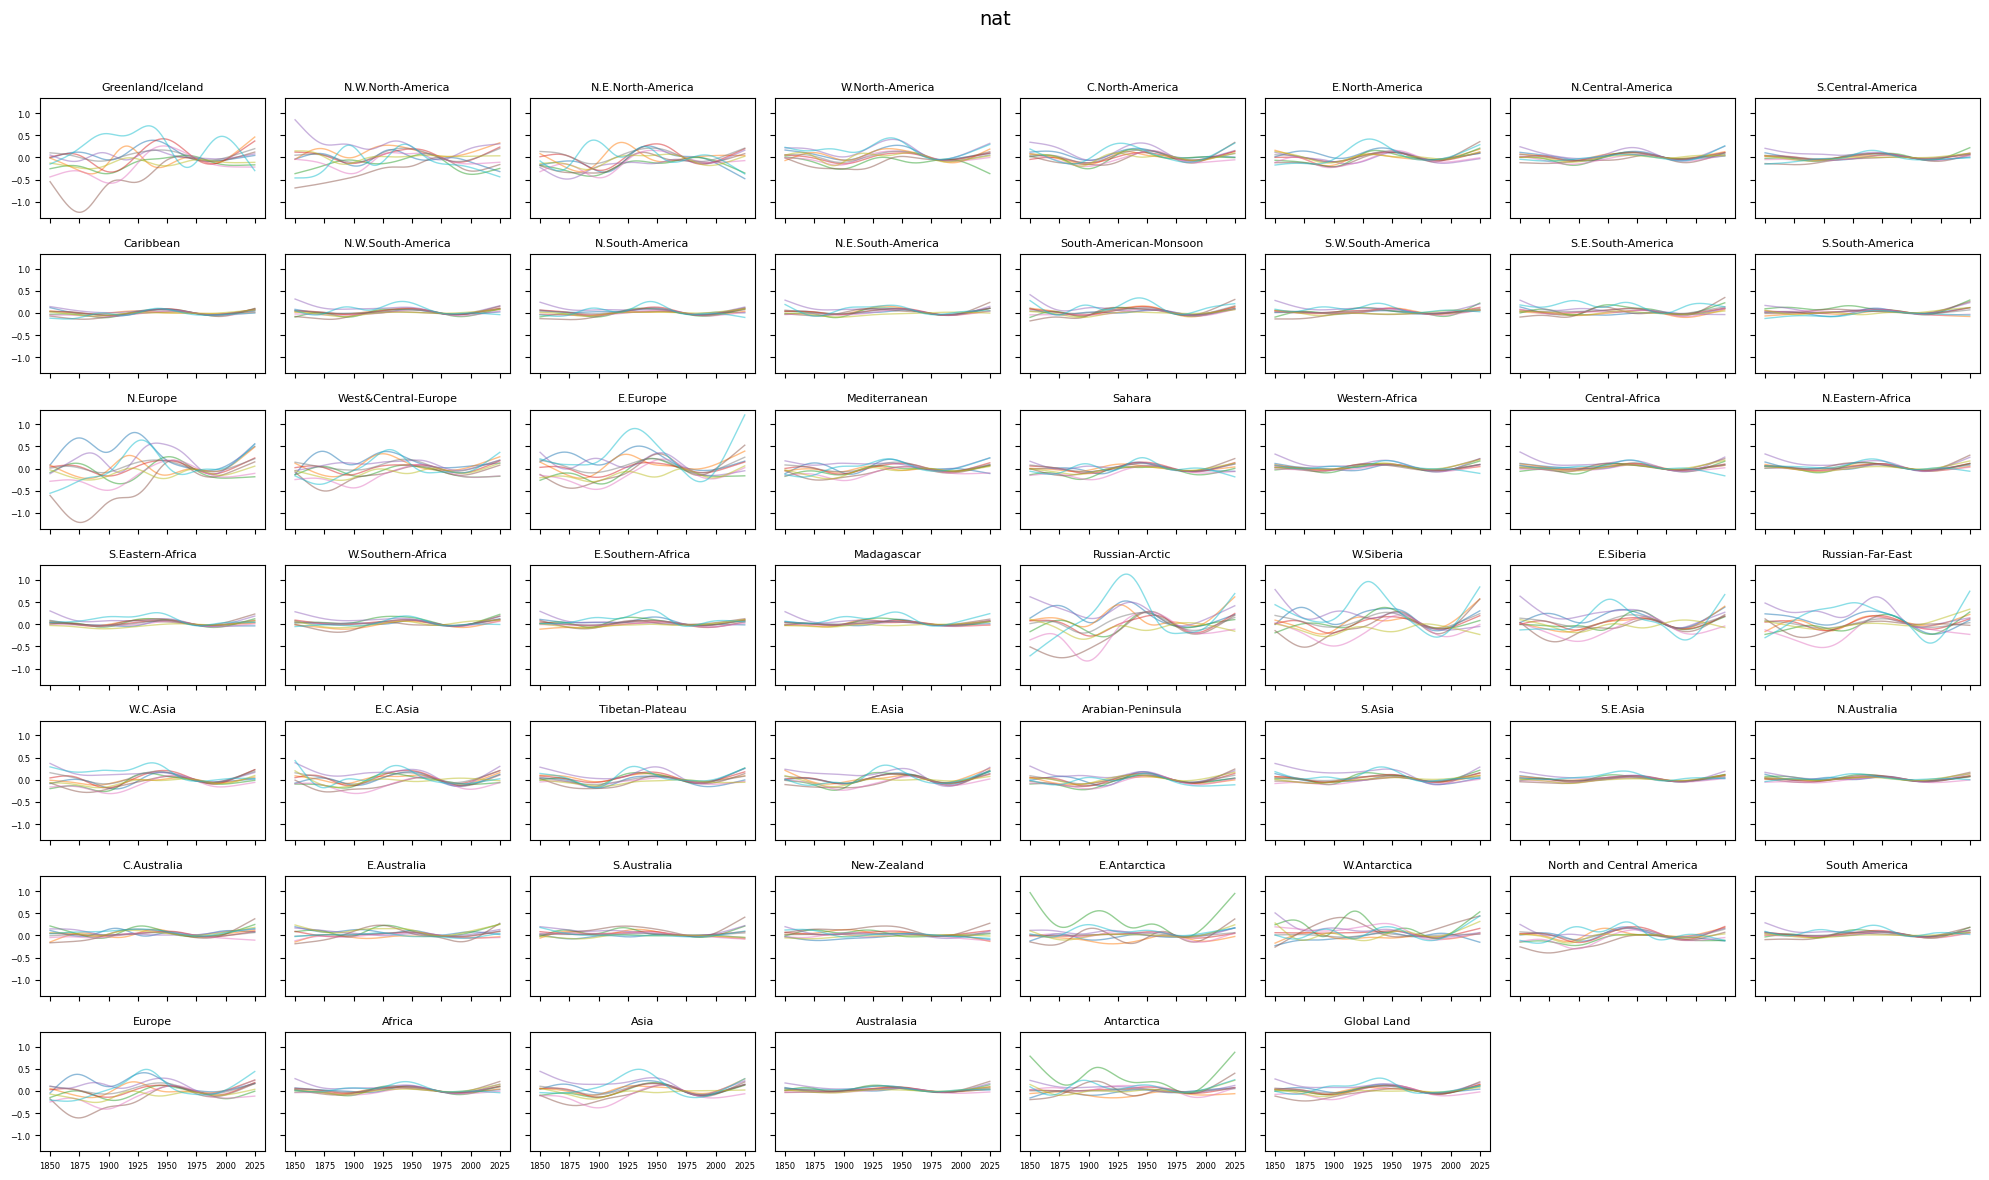

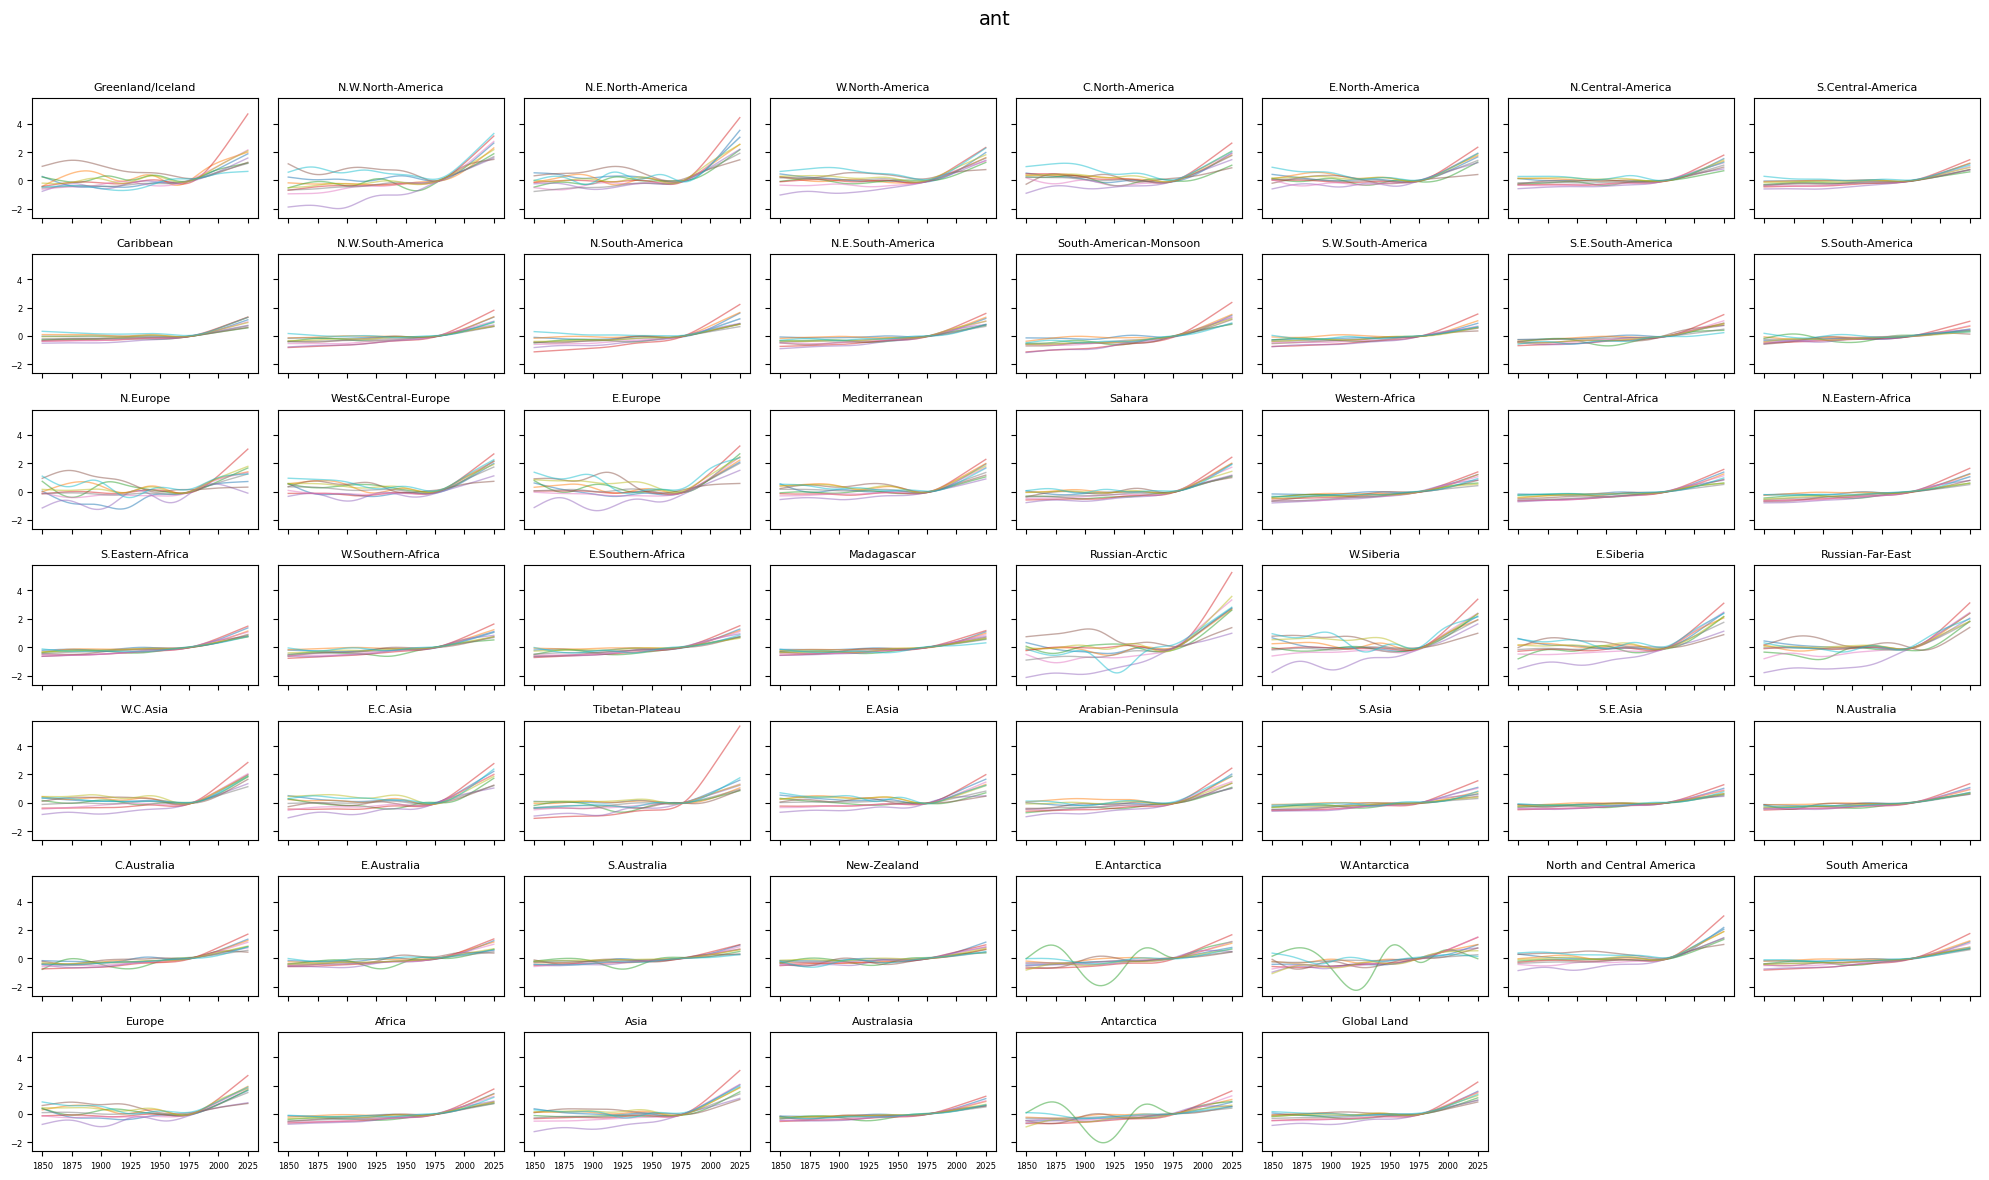

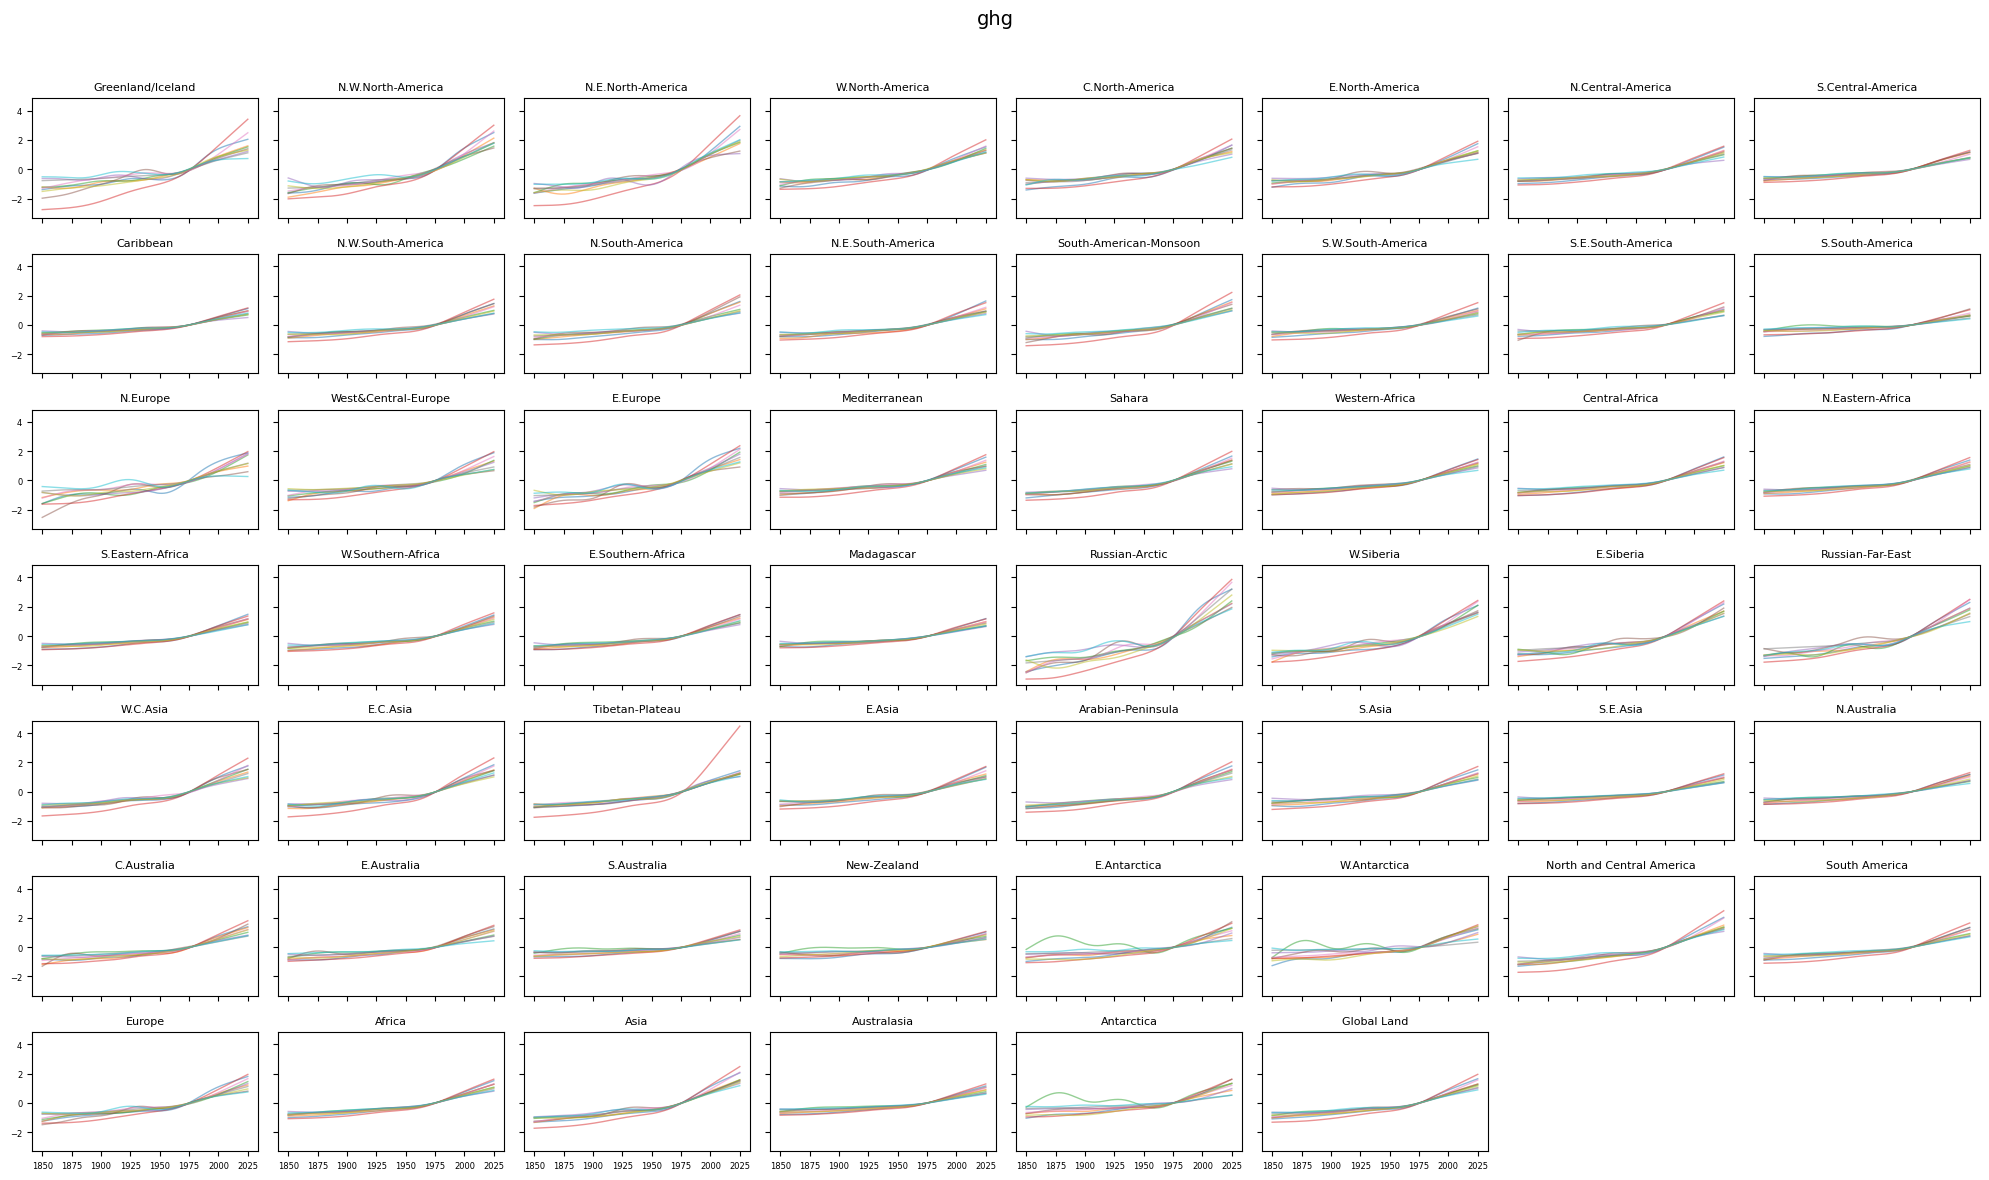

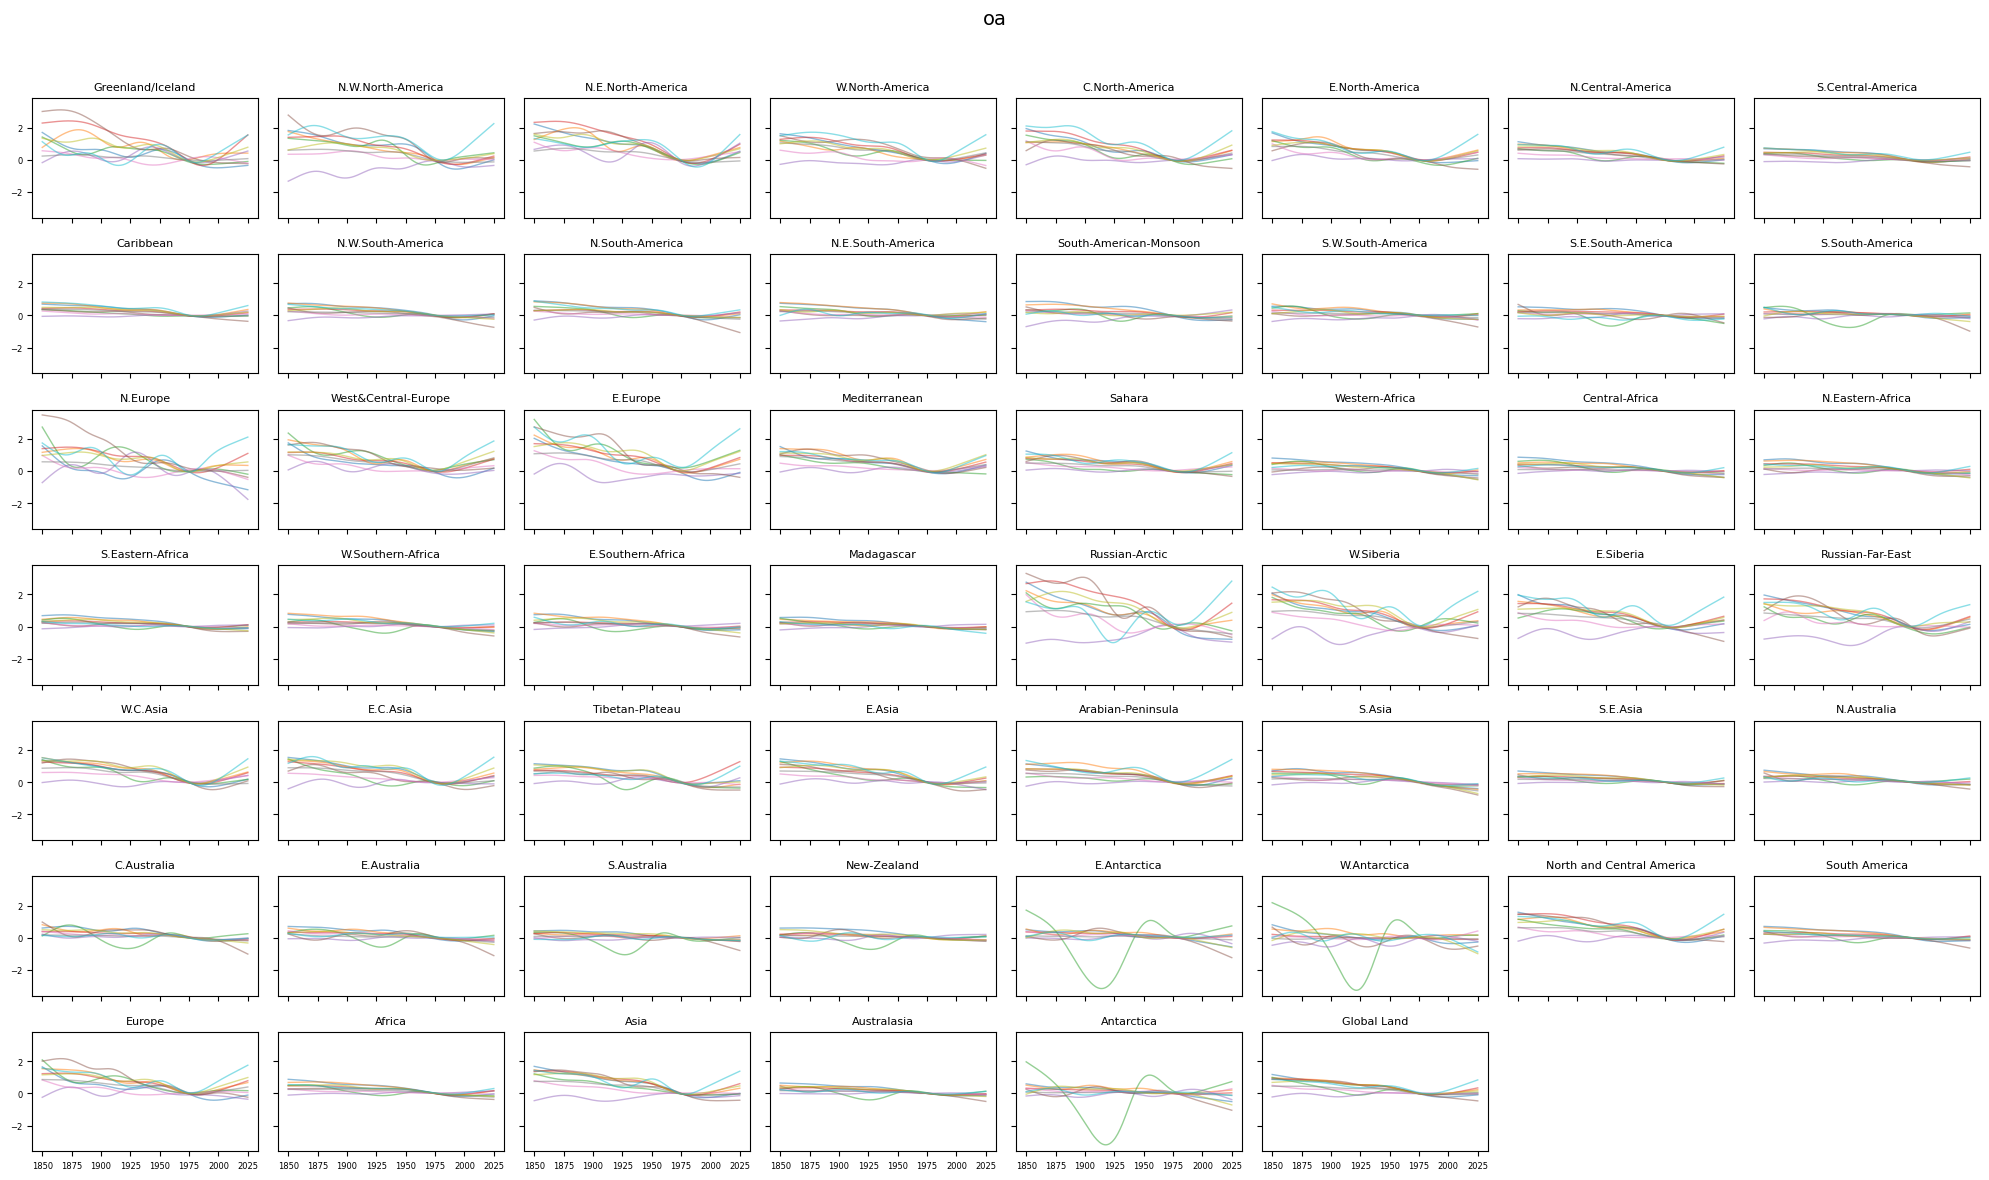

In [15]:
plot_model_time_series_per_region(smoothed_mod_all, title = 'ALL')
plot_model_time_series_per_region(smoothed_mod_sub_force.sel(forcing = 'NAT'), title = 'nat')
plot_model_time_series_per_region(smoothed_mod_sub_force.sel(forcing = 'ANT'), title = 'ant')
plot_model_time_series_per_region(smoothed_mod_sub_force.sel(forcing = 'GHG'), title = 'ghg')
plot_model_time_series_per_region(smoothed_mod_sub_force.sel(forcing = 'OA'), title = 'oa')
